<a href="https://colab.research.google.com/github/tussharkas/first-project/blob/main/Copy_of_aspect_oriented_program_500_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Index(['ID', 'Feedback', 'Sentiment Label', 'Ratings'], dtype='object')


Device set to use cpu


Streaming output truncated to the last 5000 lines.
Text: The overall dignosis, treantment plan and post opp recevery management was super excellent and have a complete recovery without any post opp complications despite having complex health condition prior to the surgery. 
Aspect: cleanliness
Predicted Sentiment: The sentiment of the review about cleanliness is positive. (Confidence: 0.96)

Text: The overall dignosis, treantment plan and post opp recevery management was super excellent and have a complete recovery without any post opp complications despite having complex health condition prior to the surgery. 
Aspect: staff
Predicted Sentiment: The sentiment of the review about staff is positive. (Confidence: 0.97)

Text: The entire doctors team, Dr Gayathri from gynaecology, Dr sharath chandra from surgery and Dr sudha from internal medicine, Dr Shwetha from gynaecology and the nursing staff, have given the best treatment and excellent psychological support to us.
Aspect: service
Pre

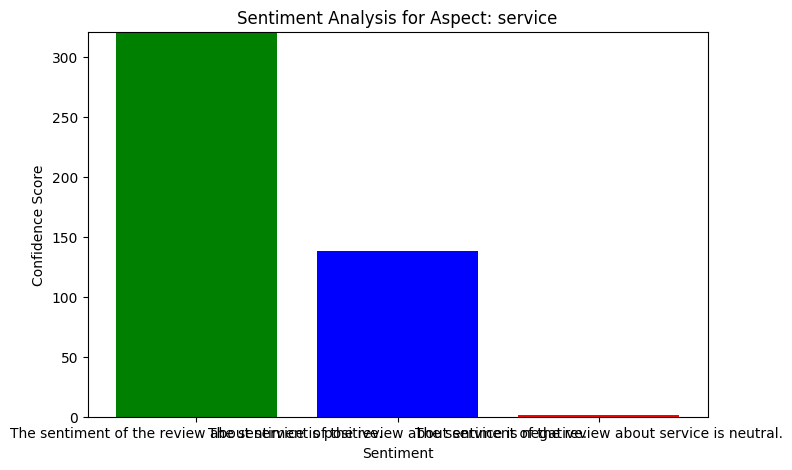

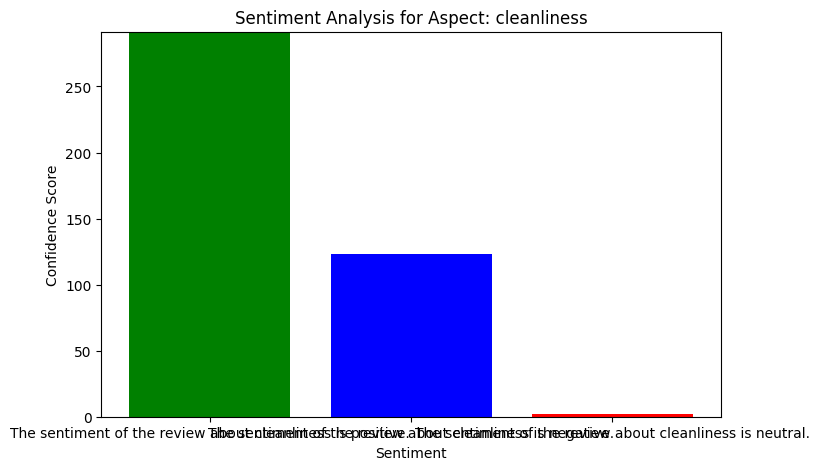

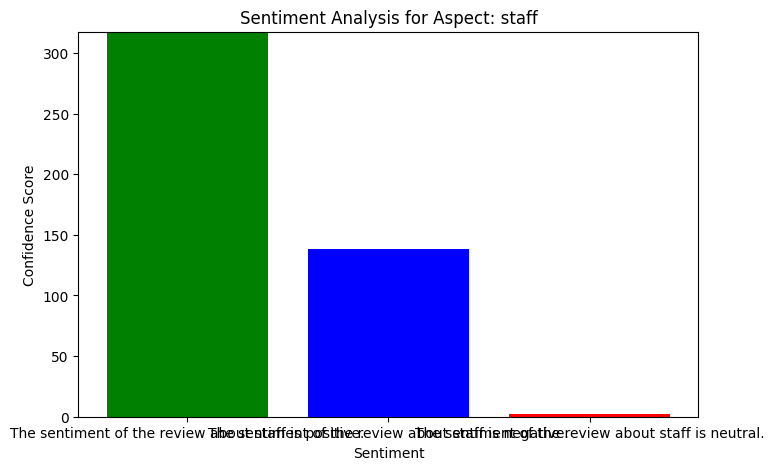

In [ ]:
from transformers import pipeline
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd
import ast


# Load the dataset
file_path = ('/content/new dataset hospital 500.csv')  # Ensure the path is correct
df = pd.read_csv(file_path)

# Check the first few rows of the dataset
print(df.columns)


# Load zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define possible sentiment labels
sentiment_labels = ["positive", "neutral", "negative"]

# Define the function
def analyze_reviews(reviews):
    results = []  # Initialize a list to store results

    for review in reviews:  # Loop through each review
        text = review["text"]
        for aspect in review["aspects"]:  # Loop through aspects in the review
            # Formulate hypothesis for the current aspect
            hypothesis_template = f"The sentiment of the review about {aspect} is {{}}."
            sentiment_labels = ["positive", "neutral", "negative"]
            hypotheses = [hypothesis_template.format(label) for label in sentiment_labels]
            print(hypotheses)
            # Perform zero-shot classification using the classifier pipeline
            prediction = classifier(
                text,
                [hypothesis_template.format(label) for label in sentiment_labels]
            )

            print("Generated Hypotheses:")
            for hypothesis in hypotheses:
                 print(hypothesis)

            # Extract predicted label and confidence score
            predicted_label = prediction["labels"][0]
            confidence_score = prediction["scores"][0]

            # Append the results
            results.append({
                "text": text,
                "aspect": aspect,
                "predicted_sentiment": predicted_label,
                "confidence": confidence_score,
            })
    return results  # Return the list of results

# Visualization function
def visualize_results(results):
    aspect_results = defaultdict(lambda: defaultdict(float))

    for result in results:
        aspect = result["aspect"]
        sentiment = result["predicted_sentiment"]
        confidence = result["confidence"]
        aspect_results[aspect][sentiment] += confidence

    for aspect, sentiment_scores in aspect_results.items():
        sentiments = list(sentiment_scores.keys())
        scores = list(sentiment_scores.values())

        plt.figure(figsize=(8, 5))
        plt.bar(sentiments, scores, color=["green", "blue", "red"])
        plt.title(f"Sentiment Analysis for Aspect: {aspect}")
        plt.ylabel("Confidence Score")
        plt.xlabel("Sentiment")
        plt.ylim(0, max(scores) + 0.1)
        plt.show()

reviews = []

for _, row in df.iterrows():
   if pd.notna(row['Feedback']):
    reviews.append({
        "text": row['Feedback'],  # Replace with your column name
        "aspects": ["service", "cleanliness", "staff"] # Convert string to list
    })

print(reviews[:5])


# Analyze reviews
results = analyze_reviews(reviews)

# Display results
for result in results:
    print(f"Text: {result['text']}")
    print(f"Aspect: {result['aspect']}")
    print(f"Predicted Sentiment: {result['predicted_sentiment']} (Confidence: {result['confidence']:.2f})\n")

# Visualize results
visualize_results(results)
